In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import json
import numpy as np
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["royalblue", "orchid", "limegreen", "orange", "pink", "cyan"])

In [4]:
curve_df = pd.read_csv("data/curve/last_model_curve", names=["model", "epoch", "test_acc"])
fps_df = pd.read_csv("data/fps/last_model_fps", names=["model", "epoch", "test_acc"])

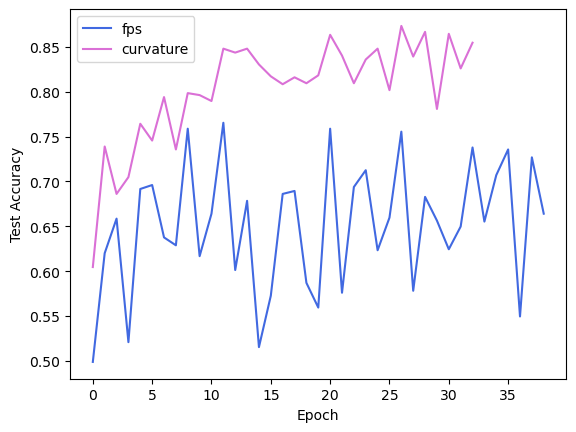

In [5]:
plt.figure()
plt.plot(fps_df["test_acc"],label="fps")
plt.plot(curve_df["test_acc"],label="curvature")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.show()

Cloudsize

In [6]:
curve_df = pd.read_csv("data/true_cloud.txt", names=["n_points", "n_epochs", "bias","k","test_acc"])
fps_df = pd.read_csv("data/true_fps.txt", names=["n_points", "n_epochs", "bias","k","test_acc"])
fps_df

,n_points,n_epochs,bias,k,test_acc
0,2048,50,0.0,10,"[0.6255506873130798, 0.6563876867294312, 0.802..."
1,1024,50,0.0,10,"[0.6552863717079163, 0.7665198445320129, 0.747..."
2,512,50,0.0,10,"[0.5616739988327026, 0.7015418410301208, 0.761..."
3,128,50,0.0,10,"[0.39757710695266724, 0.5506607890129089, 0.64..."
4,32,50,0.0,10,"[0.19162996113300323, 0.3138766586780548, 0.41..."


In [7]:
test = curve_df["test_acc"][0]

Final performance

In [8]:
def eval_string(df, n_points):
    return json.loads(df[df["n_points"]==n_points]["test_acc"].item())

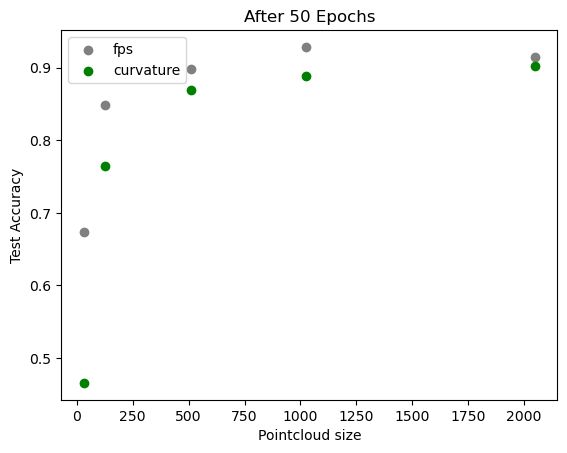

In [9]:
# only looking at final performance
plt.figure()
for n_points in fps_df["n_points"]:
    plt.scatter(n_points,eval_string(fps_df, n_points)[-1],color="grey")
    plt.scatter(n_points,eval_string(curve_df, n_points)[-1],color="green")

# plt.plot(curve_df["test_acc"],label="curvature")
plt.scatter([], [], color="grey", label="fps")
plt.scatter([], [], color="green", label="curvature")

plt.legend()
plt.title("After 50 Epochs")
plt.xlabel("Pointcloud size")
plt.ylabel("Test Accuracy")
plt.show()

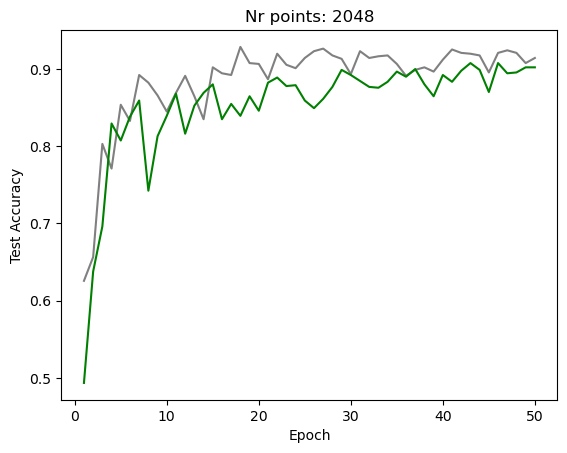

In [10]:
n_points = 2048
plt.figure()
# for n_points in curve_df["n_points"]:
plt.plot(range(1,51),eval_string(fps_df, n_points),color="grey")
plt.plot(range(1,51),eval_string(curve_df, n_points),color="green")
plt.title(f"Nr points: {n_points}")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.show()

Learning speed

In [18]:
all_points = curve_df["n_points"]
res = np.empty((50, len(all_points)))
for idx, n_points in enumerate(curve_df["n_points"]):
    res[:, idx] = np.array(eval_string(curve_df, n_points)) - np.array(eval_string(fps_df, n_points))
    # res.append(np.array(eval_string(curve_df, n_points)) - np.array(eval_string(fps_df, n_points)))

# plt.figure()
# plt.plot(curve_df.n_points,res,color="grey")
# plt.title(f"")
# plt.xlabel("Epoch")
# plt.ylabel("Average Advantage Fps")
# plt.show()

In [19]:
res = pd.DataFrame(res, columns=all_points)
res

n_points,1024,2048,512,128,32
0,-0.107930,-0.132159,0.006608,-0.145374,-0.017621
1,-0.033040,-0.018722,-0.149780,-0.161894,-0.136564
2,-0.040749,-0.106828,-0.094714,-0.254405,-0.224670
3,-0.099119,0.058370,-0.037445,-0.263216,-0.264317
4,-0.094714,-0.046255,-0.066079,-0.214758,-0.348018
5,-0.002203,0.005507,-0.131057,-0.259912,-0.283040
6,-0.025330,-0.033040,-0.085903,-0.238987,-0.281938
7,-0.049559,-0.139868,-0.053965,-0.255507,-0.255507
8,-0.022026,-0.052863,-0.057269,-0.180617,-0.289648
9,-0.039648,-0.005507,-0.078194,-0.229075,-0.247797


<Figure size 1200x800 with 0 Axes>

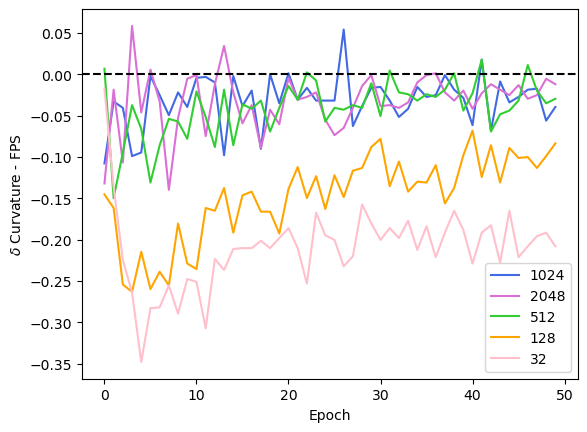

In [41]:
plt.figure(figsize=(12,8))
res.plot()
plt.axhline(0, color="black", linestyle="--")
plt.ylabel(r"$\delta$ Curvature - FPS")
plt.xlabel("Epoch")
plt.legend()
plt.show()